### load the train data

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import iplot
cf.go_offline()

In [27]:
train = pd.read_json('train.json').set_index('id')
test = pd.read_json('test.json').set_index('id')

In [8]:
train.head(5)

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 10259 to 2362
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cuisine      39774 non-null  object
 1   ingredients  39774 non-null  object
dtypes: object(2)
memory usage: 932.2+ KB


In [28]:
print(f'there are {train.shape[0]} rows in the train dataset')
print(f'there are {test.shape[0]} rows in the test dataset')

there are 39774 rows in the train dataset
there are 9944 rows in the test dataset


In [32]:
def missing_or_not(data):
    sns.heatmap(data.isnull(), cmap='viridis',cbar=False, yticklabels=[])
    fig = plt.gcf()
    fig.set_size_inches(10,6)

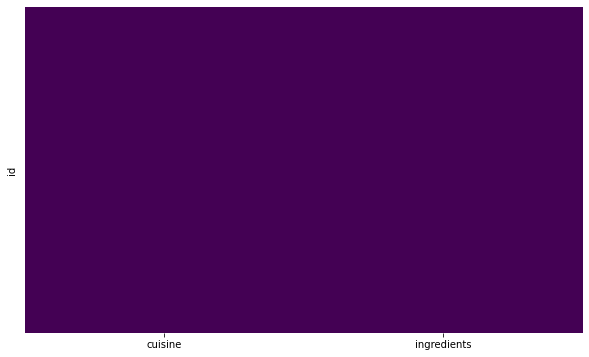

In [33]:
missing_or_not(train)

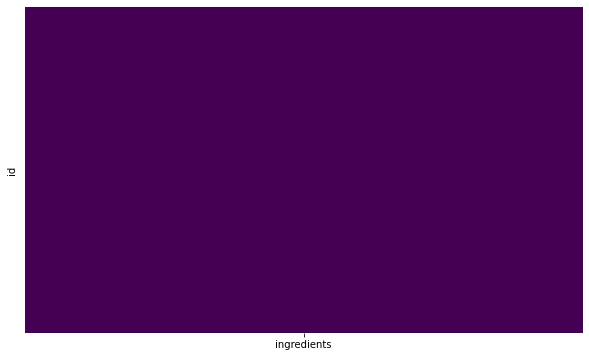

In [34]:
missing_or_not(test)

### DATA EDA

In [41]:
print(f"There are {train['cuisine'].nunique()} unique countris from which the cuisines in our train dataset are from")

There are 20 unique countris from which the cuisines in our train dataset are from


In [105]:
data = [go.Table(header = dict(values=['Cuisine', 'No. of recipes'], fill=dict(color='lightgray'), align=['left']*5 ),
                cells = dict(values=[train['cuisine'].value_counts().index,train['cuisine'].value_counts()], align=['left']*5))]
layout = go.Layout(title = 'Number of recipes from each country category',
                  title_font=dict(size=20),width=500, height=500, margin=dict(l=30,r=30,b=1,t=50,pad=1))

iplot(dict(data=data,layout=layout))

In [101]:
train['cuisine'].value_counts().sort_values().iplot(kind='barh')

In [106]:
train['No. of ingredients'] = train['ingredients'].apply(len)

In [129]:
train['No. of ingredients'].iplot(kind='hist',layout=go.Layout(title='Distribution of Recipe Length', xaxis=dict(title='number of ingredients'), yaxis = dict(title='number of recipes')))

In [190]:
print(f"the longest recipe has {train['No. of ingredients'].max()} ingredients and it is a {train[train['No. of ingredients']==train['No. of ingredients'].max()].values[0][0]} cuisine")
print(' ')
print(f"the ingredients in the longest recipe are: \n {train[train['No. of ingredients']==train['No. of ingredients'].max()].values[0][1]}")

the longest recipe has 65 ingredients and it is a italian cuisine
 
the ingredients in the longest recipe are: 
 ['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'Neufchâtel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach'

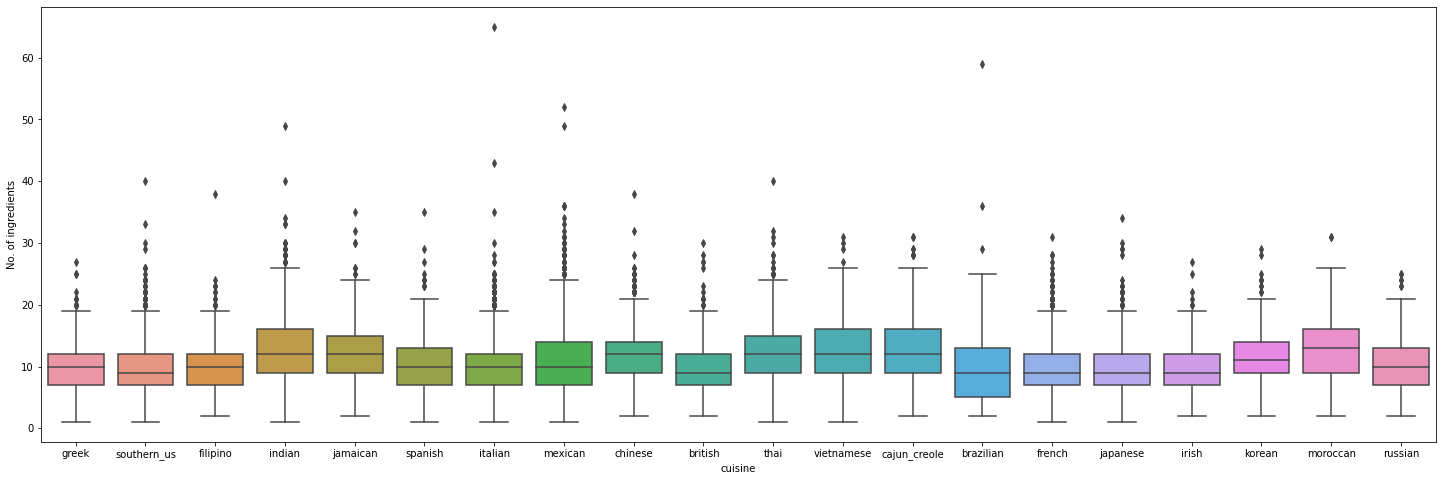

In [423]:
sns.boxplot(data=train, x='cuisine', y='No. of ingredients')
fig = plt.gcf()
fig.set_size_inches(25, 8)

In [426]:
country = [i for i in train['cuisine'].value_counts().index][::-1]
data = []
for i in country:
    trace = go.Box(y=train[train['cuisine']==i]['No. of ingredients'], name=i)
    data.append(trace)
iplot(go.Figure(data=data)) # interactive boxplots 